# Exploratory Data Analysis (EDA) on Animal Shelter Outcomes

This notebook is used for performing exploratory data analysis on the training dataset of animal shelter outcomes. The goal is to understand the distribution of the outcome types and other features.

<h4>Enter your computer's home directory</h4>

In [1]:
home_dir = r"/Users/wrngnfreeman/Github/Shelter-Animal-Outcomes"

#### Import required modules

In [2]:
import sys
import random
import pandas as pd

sys.path.append(home_dir + r"/src")
import data_processing, viz

## Load datasets

In [3]:
AnimalID=r"AnimalID"

# Load and process the dataset
processed_df, animal_data, breed, breed_mix, coat_color, coat_patterns = data_processing.process_data(
    home_dir=home_dir,
    data_file=r"Austin_Animal_Center_Outcomes_20250318",
    AnimalID=AnimalID,
    dep_var=r"OutcomeType"
)

# Display the few rows of the dataset
processed_df.loc[
    processed_df[AnimalID].isin(random.sample(processed_df[AnimalID].unique().tolist(), 5)),
    :
].drop(columns="BreedType").rename(columns={"Breed_broken": "Breed"})

,AnimalID,OutcomeType,Name,DateTime,AnimalType,AgeuponOutcome,SexuponOutcome,Sterilization,Breed,Mix,CoatColor,CoatPattern
45857,A692589,Adoption,NaN,12/14/2014 05:32:00 PM,Cat,<6 months,Male,Sterilized,Domestic Shorthair,Mix,Gray,NaN
45858,A692589,Adoption,NaN,12/14/2014 05:32:00 PM,Cat,<6 months,Male,Sterilized,Domestic Shorthair,Mix,White,NaN
115563,A751687,Transfer,*Wilson,08/16/2017 12:00:00 AM,Cat,<6 months,Male,Sterilized,Domestic Shorthair,Mix,Black,NaN
115564,A751687,Transfer,*Wilson,08/16/2017 12:00:00 AM,Cat,<6 months,Male,Sterilized,Domestic Shorthair,Mix,White,NaN
116670,A752669,Return_to_owner,Meow Meow,06/26/2017 03:57:00 PM,Cat,<5 years,Female,Sterilized,Domestic Shorthair,Mix,Tortie,NaN
170132,A797898,Adoption,*Capt Graham Cracker,08/03/2019 05:23:00 PM,Cat,<6 months,Male,Sterilized,Domestic Shorthair,Pure breed,Brown,Tabby
170133,A797898,Adoption,*Capt Graham Cracker,08/03/2019 05:23:00 PM,Cat,<6 months,Male,Sterilized,Domestic Shorthair,Pure breed,White,Tabby
222104,A853535,Return_to_owner,Sofia,03/28/2022 09:55:00 AM,Cat,<5 years,NaN,NaN,Domestic Shorthair,Pure breed,Black,NaN
222105,A853535,Return_to_owner,Sofia,03/28/2022 09:55:00 AM,Cat,<5 years,NaN,NaN,Domestic Shorthair,Pure breed,White,NaN


## Visualizations

### Distribution of the dependent variable "OutcomeType"

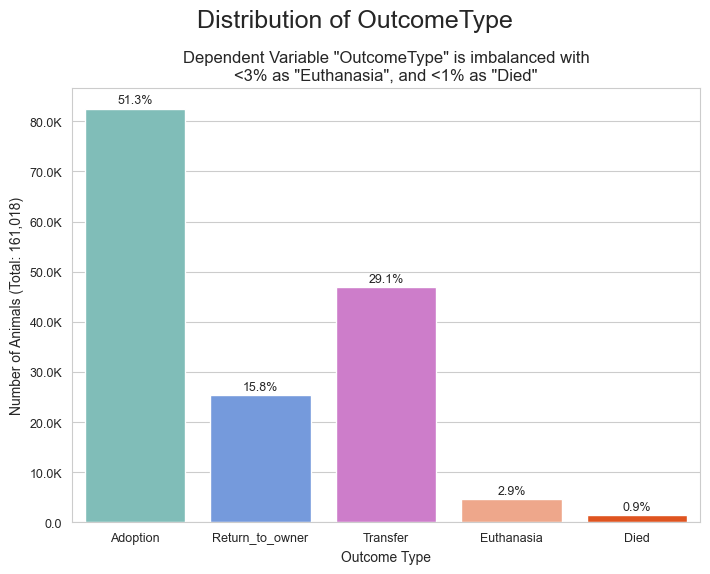

In [4]:
viz.viz_outcometype(home_dir=home_dir, processed_df=animal_data)

### Distribution of AnimalType

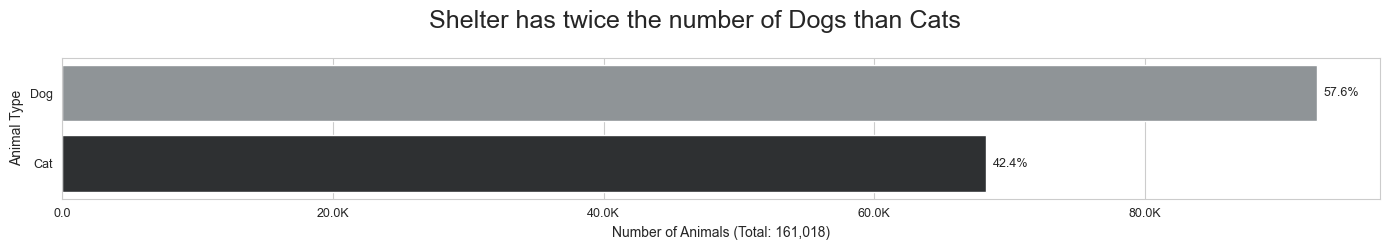

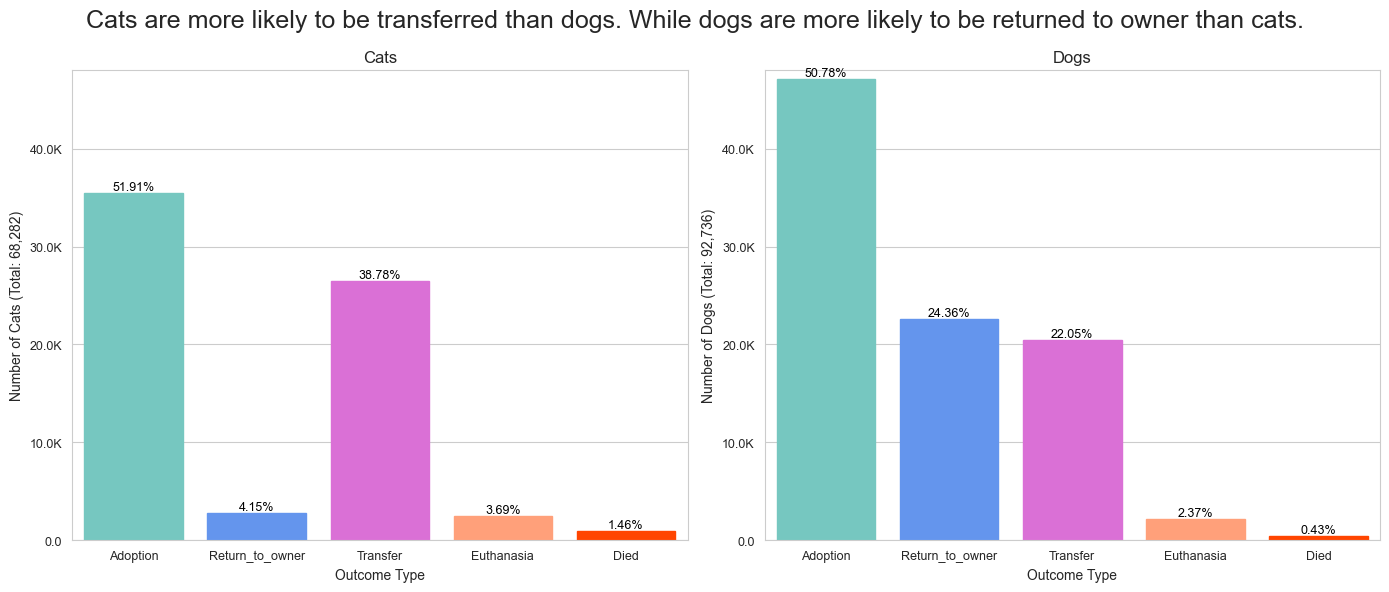

In [5]:
viz.viz_animal_type(home_dir=home_dir, processed_df=animal_data)

### How does Age determine the outcome of an animal?

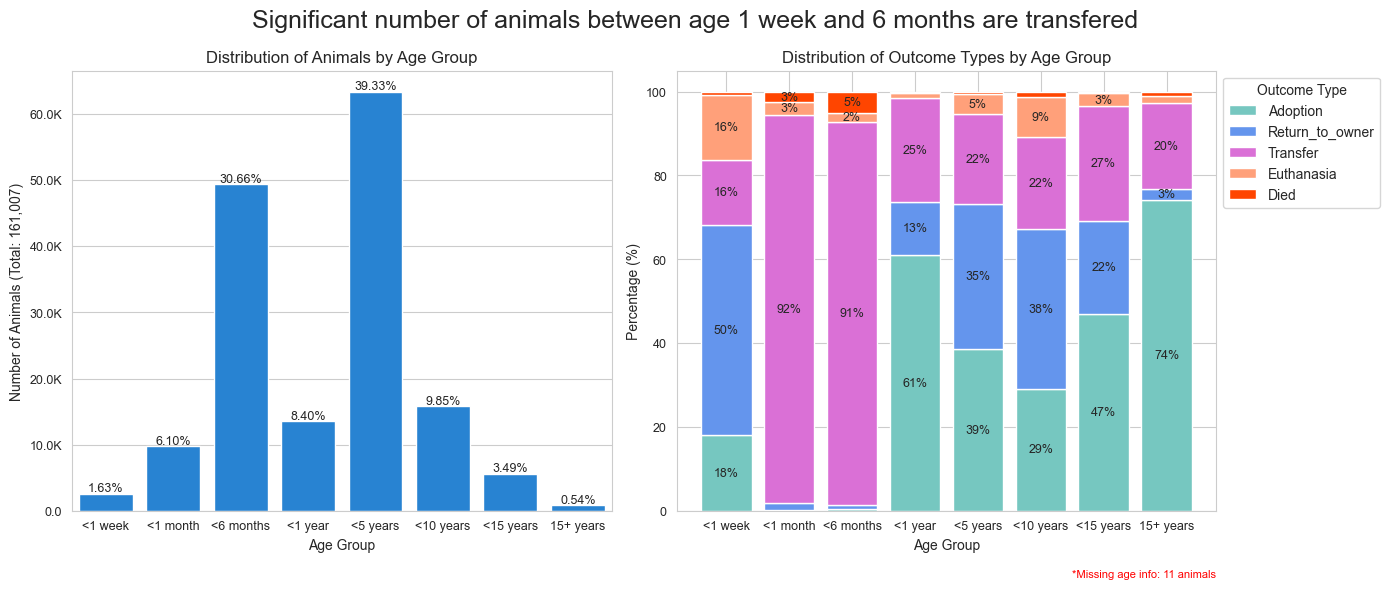

In [6]:
viz.viz_age(home_dir=home_dir, processed_df=animal_data)

### How does sex determine the outcome of an animal?

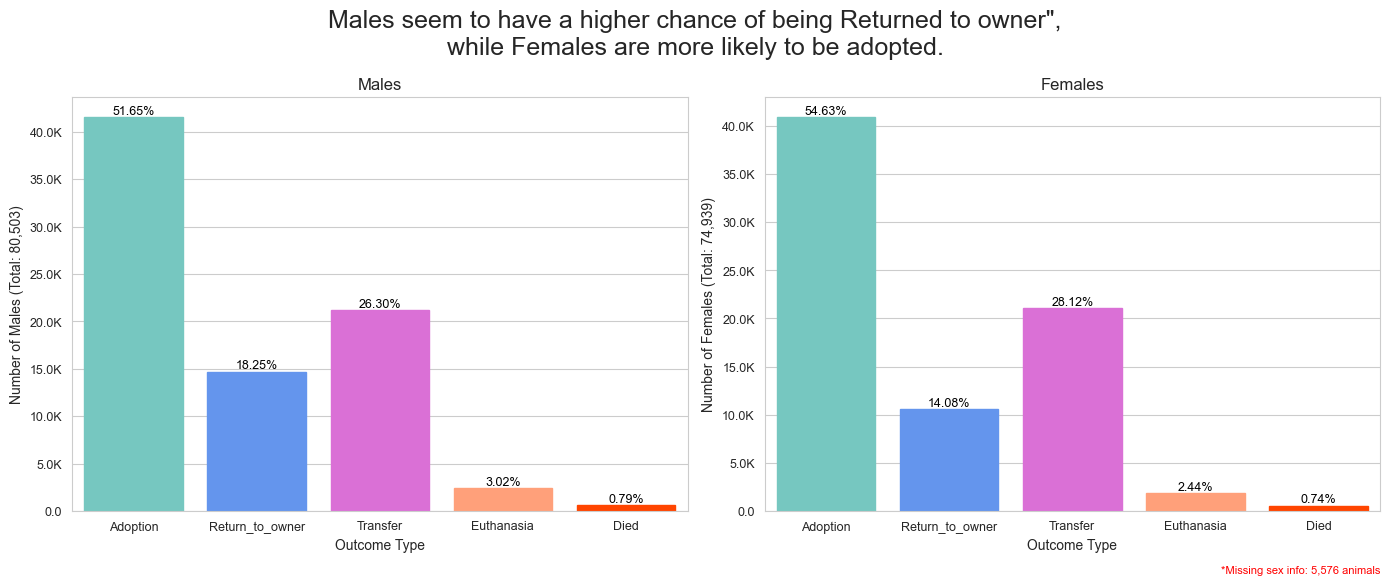

In [7]:
viz.viz_sex(home_dir=home_dir, processed_df=animal_data)

### How does Sterilization determine the outcome of an animal?

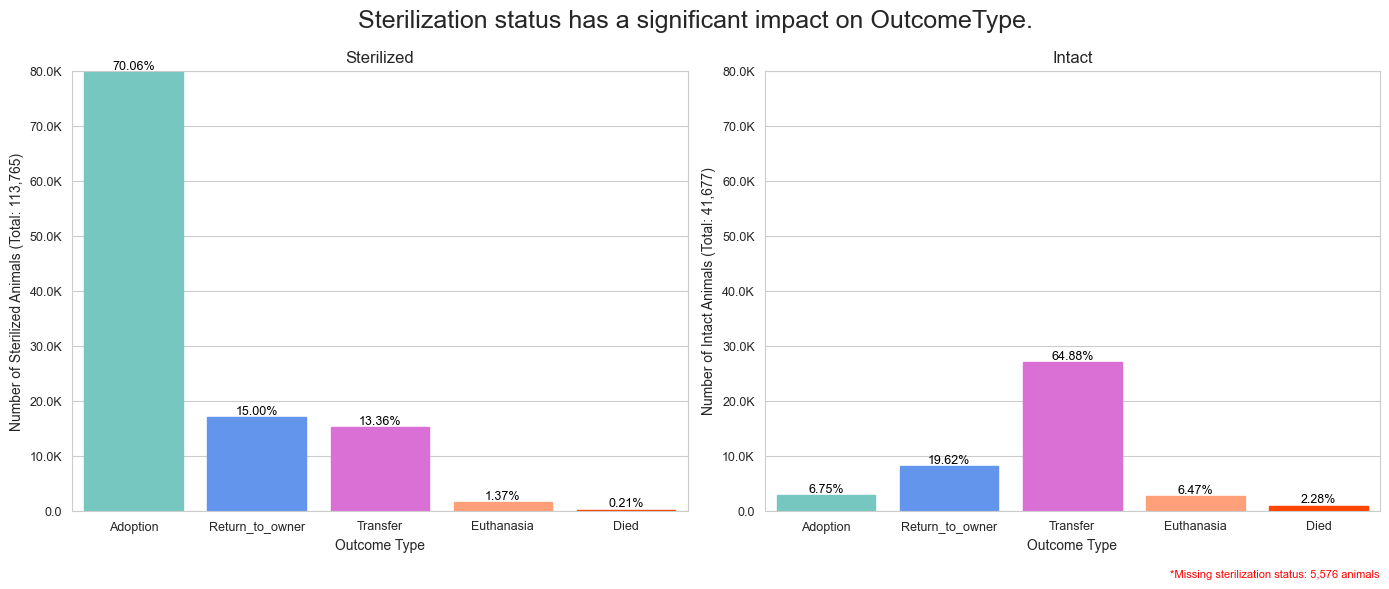

In [8]:
viz.viz_sterilization(home_dir=home_dir, processed_df=animal_data)

### What breeds do we have in the shelter?

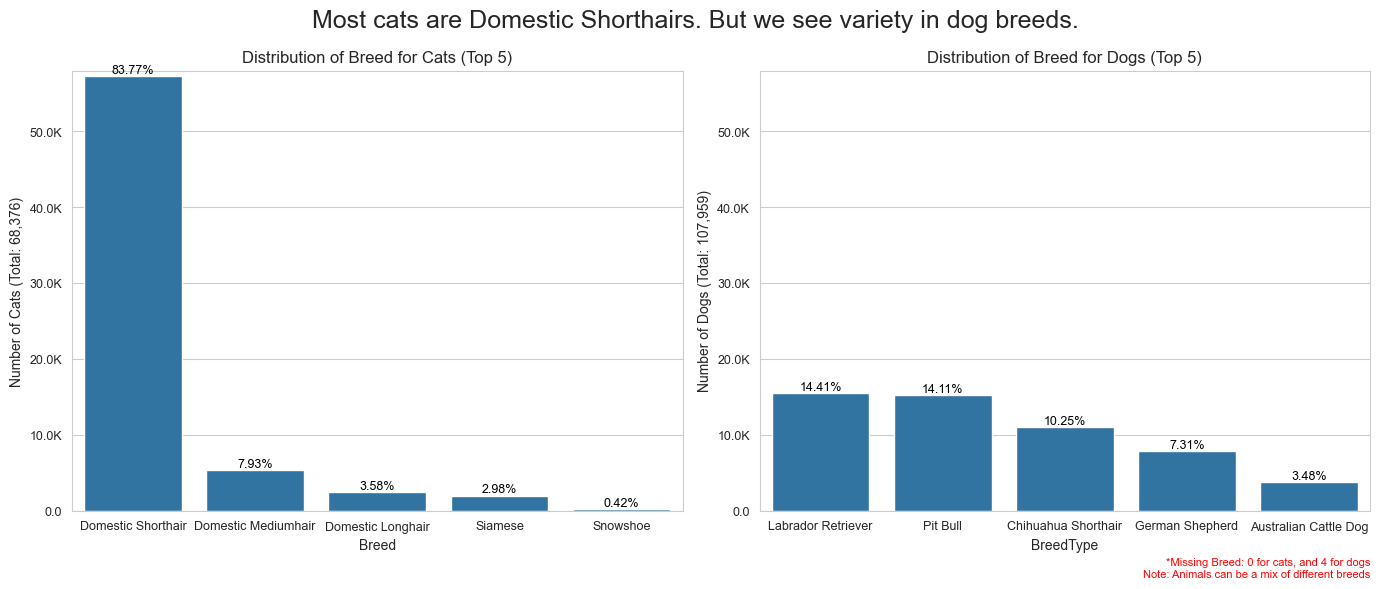

In [9]:
viz.viz_breed(
    home_dir=home_dir,
    processed_df=pd.merge(
        left=animal_data,
        right=breed,
        left_on=AnimalID,
        right_on=AnimalID,
        how='left'
    ),
    top_n=5
)

### How does being a pure breed or mixed breed animal determine the outcome of that animal?

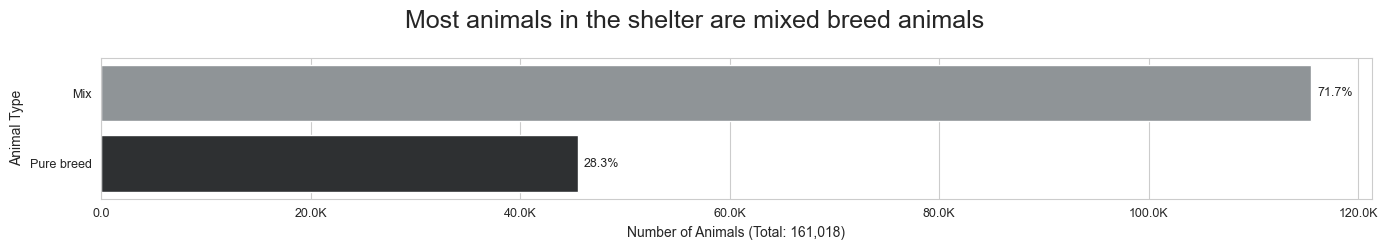

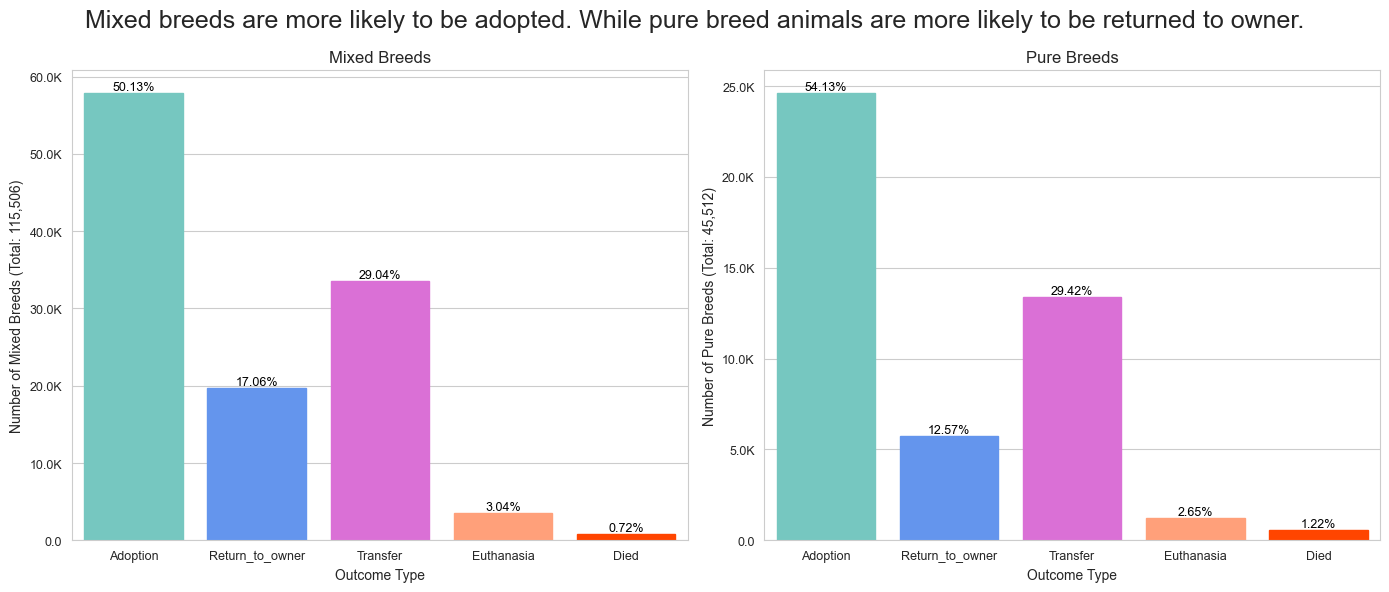

In [10]:
viz.viz_breed_mix(
    home_dir=home_dir,
    processed_df=pd.merge(
        left=animal_data,
        right=breed_mix,
        left_on=AnimalID,
        right_on=AnimalID,
        how='left'
    )
)

### What colored animals do we have in the shelter?

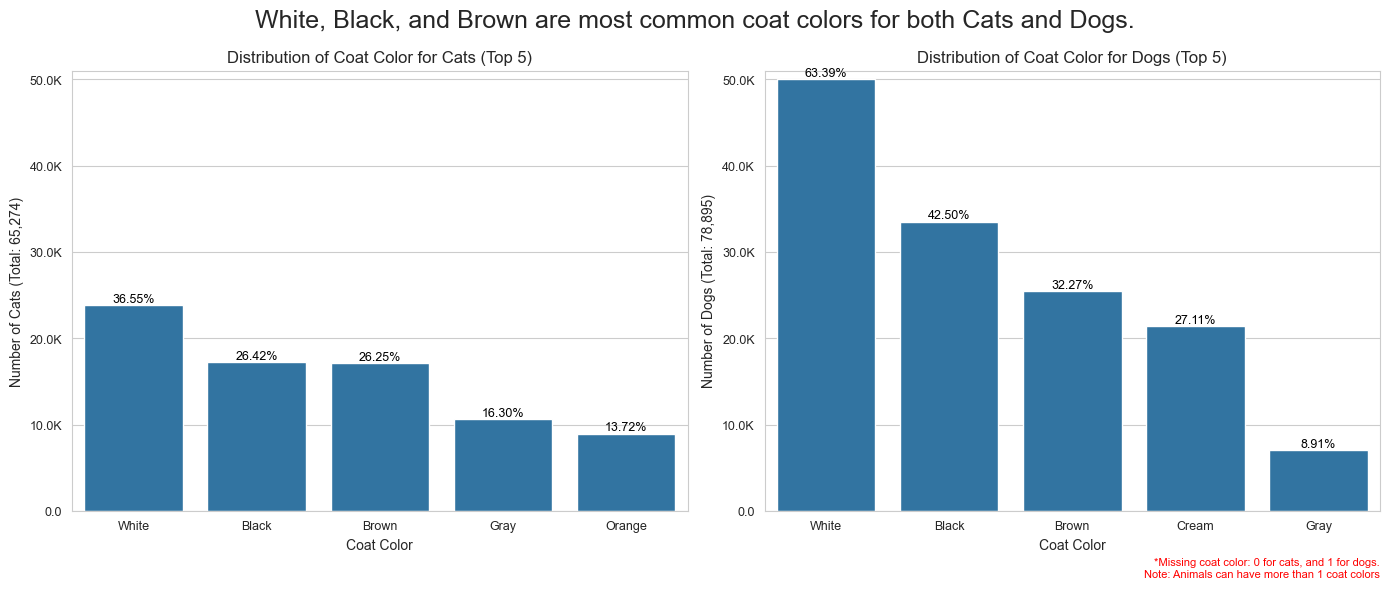

In [11]:
viz.viz_coatcolor(
    home_dir=home_dir,
    processed_df=pd.merge(
        left=animal_data,
        right=coat_color,
        left_on=AnimalID,
        right_on=AnimalID,
        how='left'
    ),
    top_n=5
)

### What coat patterns do the animals have in the shelter?

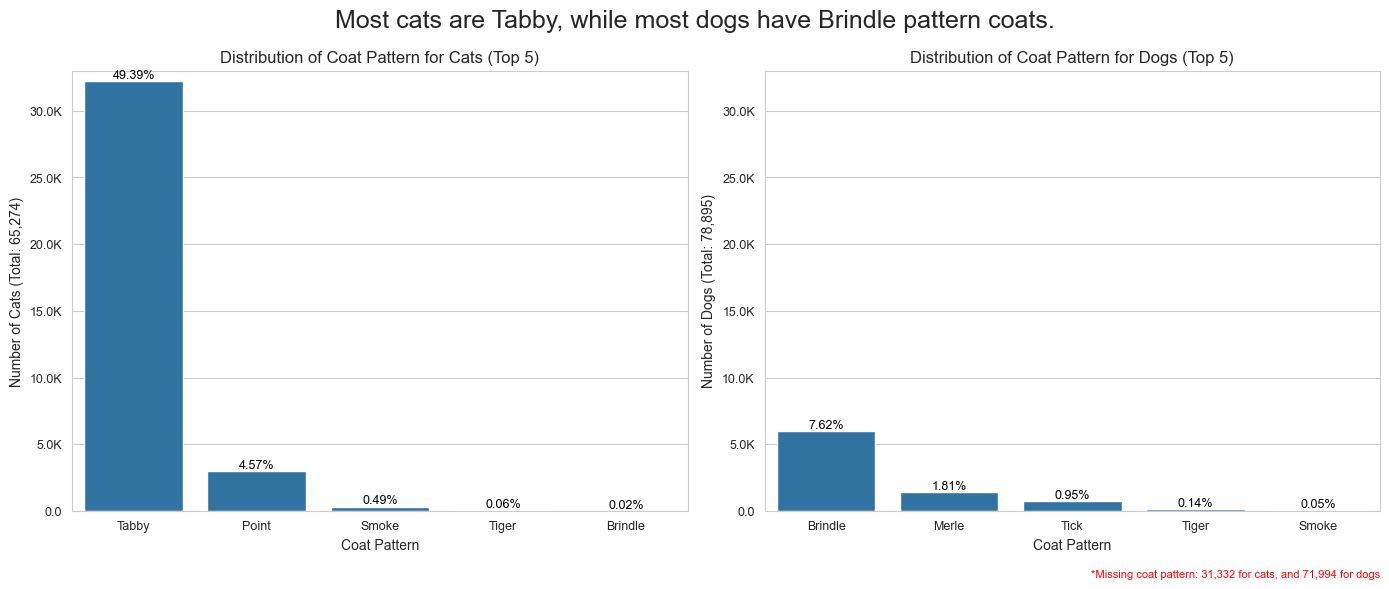

In [12]:
viz.viz_coatpattern(
    home_dir=home_dir,
    processed_df=pd.merge(
        left=animal_data,
        right=coat_patterns,
        left_on=AnimalID,
        right_on=AnimalID,
        how='left'
    ),
    top_n=5
)

## Conclusion

This exploratory analysis provides insights into the distribution of the dependent variable "OutcomeType", and other factors that effect animal's outcome at the shelter. Results from a machine learning model is expected to be in-line with these findings.

We encourage you to check out our Interactive Tableau Dashboard if you wish to investigate more on this.

[Interactive Tableau Dashboard (link 1)](https://public.tableau.com/views/InteractivePetManagementDashboard/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

[Interactive Tableau Dashboard (link 2)](https://public.tableau.com/views/InteractivePetManagementDashboard_17435387085530/Dashboard1?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)